# Communication and Collusion in Oligopoly Market Experiments: A Meta-Study using Machine Learning

# 

# Latent Semantic Analysis

## Packages

In [1]:
InstallPackages = False
if InstallPackages:
    !pip install pandas
    !pip install nltk
    !pip install numpy
    !pip install scikit-learn
    !pip install matplotlib
    !pip install seaborn

In [2]:
import sys
import pandas as pd
import nltk
import spacy
import numpy as np
import csv
import re
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt
from pprint import pprint

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [5]:
sns.set_theme(style="whitegrid")

## Seed

In [6]:
seed = 42

## Read the data

Set the path

In [7]:
path = 'C:/Users/Maximilian Andres/Nextcloud2/Collusion Meta Study/Data Analysis'
#path = '/Users/birteprado/Documents/02 Uni/02 Master/Master Thesis/05 BigData/04 Target Table/02 Target Tables/Target_GrSe.xlsx'

Read the data according to the path

In [8]:
df = pd.read_excel(path+'/Data/Target_GrSe_PP.xlsx')

Documents as type string

In [9]:
df['document'] = df['document'].astype(str)

Columns in the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudyID            399 non-null    int64  
 1   Author             399 non-null    object 
 2   Title              399 non-null    object 
 3   Year               399 non-null    int64  
 4   Journal            399 non-null    object 
 5   SingleGroup        399 non-null    int64  
 6   Session            399 non-null    int64  
 7   Group              399 non-null    int64  
 8   AvgMatchNo         399 non-null    int64  
 9   CoundOneCoopvar1   399 non-null    float64
 10  CoundOneCoopvar2   399 non-null    float64
 11  CoundAllCoopvar1   399 non-null    float64
 12  CoundAllCoopvar2   399 non-null    float64
 13  T                  399 non-null    float64
 14  R                  399 non-null    float64
 15  S                  399 non-null    float64
 16  P_1                399 non

Preview of the data

In [11]:
df.head()

,StudyID,Author,Title,Year,Journal,SingleGroup,Session,Group,AvgMatchNo,CoundOneCoopvar1,...,Rematch,AllChat_Original,AllChat_Cleaned,AllChat_Cleaned2,AllChat_PriceKeys,CommTreat,document,AuthorYear,Count,Length
0,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001001001,1,1,1,0.074074,...,0,"""bitte alle auf 110""""ja""""ja man """"dann hat jed...","""Bitte alle auf 110""""Ja""""Ja man""""Dann hat jede...","""Bitte alle auf 110""""Ja""""Ja man""""Dann hat jede...","""Bitte alle auf JointProfitPrice""""Ja""""Ja man""""...",1,bitte jointprofitaction ja ja jointprofit lo...,Bodnar et al. (2023),15,99
1,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001002001,1,2,1,0.666667,...,0,"""alle 110""""ja sehr gut""""was ist mit besprechen...","""Alle 110.""""Ja, sehr gut.""""Was ist mit Besprec...","""Alle 110.""""Ja, sehr gut.""""Was ist mit Besprec...","""Alle JointProfitPrice.""""Ja, sehr gut.""""Was is...",1,jointprofitaction ja gut besprechen ok grupp...,Bodnar et al. (2023),224,2039
2,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001003001,1,3,1,0.583333,...,0,"""alle immer 110""""ja""""und wenn keiner meldet, i...","""Alle immer 110.""""Ja""""Und wenn keiner meldet, ...","""Alle immer 110.""""Ja""""Und wenn keiner meldet, ...","""Alle immer JointProfitPrice.""""Ja""""Und wenn ke...",1,immer jointprofitaction ja melden wahrschein...,Bodnar et al. (2023),26,225
3,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001004001,1,4,1,1.000000,...,0,"""Hi""""Jeder 110 dann verdient jeder 3 Punkte = ...","""Hi""""Jeder 110, dann verdient jeder 3 Punkte i...","""Hi""""Jeder 110, dann verdient jeder 3 Punkte i...","""Hi""""Jeder JointProfitPrice, dann verdient jed...",1,hallo jointprofitaction verdienen jointpro...,Bodnar et al. (2023),28,232
4,201,Bodnar et al.,The Effects of Private Damage Claims on Cartel...,2023,"The Journal of Law, Economics, and Organization",201001005001,1,5,1,1.000000,...,0,"""Sind alle drei da?^^""""ale 110 eingeben jede r...","""Sind alle drei da? happysmiley""""Alle 110 eing...","""Sind alle drei da? happysmiley""""Alle 110 eing...","""Sind alle drei da? happysmiley""""Alle JointPro...",1,drei happysmiley jointprofitaction eingeben ...,Bodnar et al. (2023),30,254


## Latent Semantic Analysis

Latent Semantic Analysis function

In [14]:
def latent_semantic_analysis(statements, components, max_value, min_value, seed):
    
    """
    This function is used to conduct a Latent Semantic Analysis. 
    
    """
    
    #define the vectorizer
    tfidf = TfidfVectorizer(lowercase=False, 
                        stop_words=None,
                        ngram_range = (1, 1), 
                        max_df=max_value,
                        min_df=min_value
                       )
    
    #transform the statements to tf-idf
    tfidf_train_sparse = tfidf.fit_transform(statements)
    
    #build the data frame
    tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), columns=tfidf.get_feature_names_out())
    
    #conduct singular value decomposition
    lsa_obj = TruncatedSVD(n_components=components, n_iter=10000, random_state=seed)
    
    tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
    Sigma = lsa_obj.singular_values_
    V_T = lsa_obj.components_.T
    
    term_concept_matrix = pd.DataFrame(data=V_T, 
                                 index = tfidf.get_feature_names_out(),
                                 columns = [f'Latent_concept_{r}' for r in range(0,V_T.shape[1])])
    
    #get lsa
    lsa = pd.DataFrame(data=tfidf_lsa_data, columns = [f'Latent_concept_{r}' for r in range(0,len(tfidf_lsa_data[1]))])
    
    #get Sigma
    Sigma = pd.DataFrame(Sigma)
    Sigma = Sigma.rename(columns={0: 'Singular value'})
    Sigma.loc[:,'Latent concept'] = range(1,(len(Sigma)+1))
    
    return lsa, Sigma, V_T, term_concept_matrix
    

Conduct the Latent Semantic Analysis

In [15]:
lsa, Sigma, V_T, term_concept_matrix = latent_semantic_analysis(statements = df[df['document'] != 'nan']['document'], 
                                                                components = 10, 
                                                                max_value = 0.999,#0.999
                                                                min_value=0.001,#0.001
                                                                seed = seed)

## Visualize the results

Visualize Sigma as a barplot

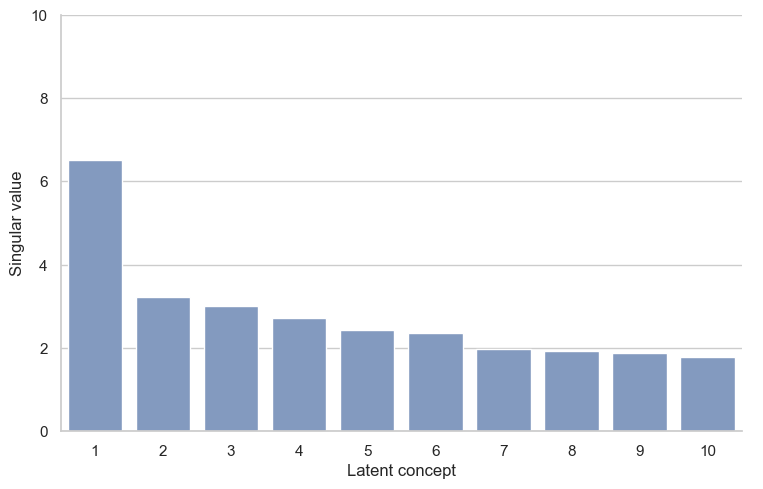

In [16]:
g = sns.catplot(data = Sigma,
            kind="bar",
            x='Latent concept',
            y='Singular value',
            color= '#7998C9',
            height=5, aspect=1.5,
)
g.set(xlabel='Latent concept')
g.set(ylabel='Singular value')
g.set(ylim=(0, 10))
g.figure.savefig(path + '/Figures/Figure_Sigma.pdf', dpi = 300)

Visualize V_T

In [17]:
def plot_latent_concept(term_concept_matrix, number_of_latent_concept, number_of_tokens, language):
    
    """
    This function is used to plot the latent concepts. 
    
    """
    
    #define the data
    top = pd.DataFrame(term_concept_matrix[f'Latent_concept_'+str(number_of_latent_concept)].sort_values(ascending=False)[:number_of_tokens])
    
    #get the tokens
    top.loc[:,'Token German'] = top.index.values.astype(str)
    
    #plot
    g = sns.catplot(data = top,
            kind="bar",
            x='Latent_concept_'+str(number_of_latent_concept),
            y='Token '+str(language),
            color= '#7998C9',
            height=5, aspect=1.5,
    )
    g.set(xlabel='Singular value')
    g.set(ylabel=None)
    g.set(xlim=(0, 1))
    g.figure.savefig(path + '/Figures/Figure_'+'Latent_concept_'+str(number_of_latent_concept)+'_'+str(language)+'.pdf', dpi = 300)
    
    
    return g

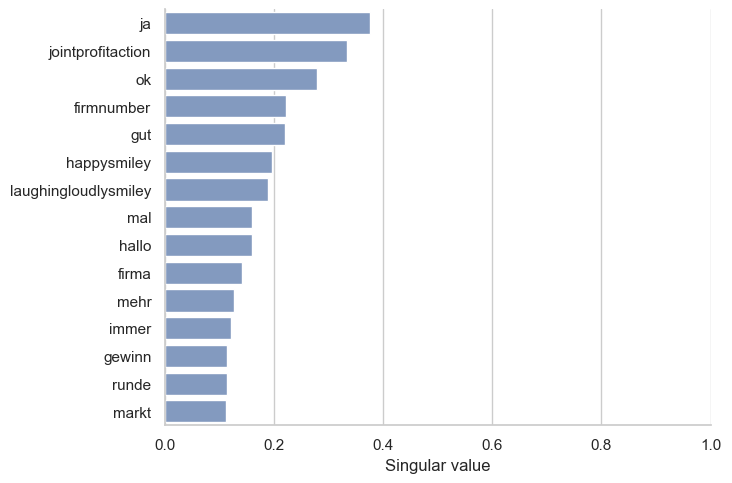

In [40]:
plot_latent_concept(term_concept_matrix, number_of_latent_concept=0,number_of_tokens=15,language='German')

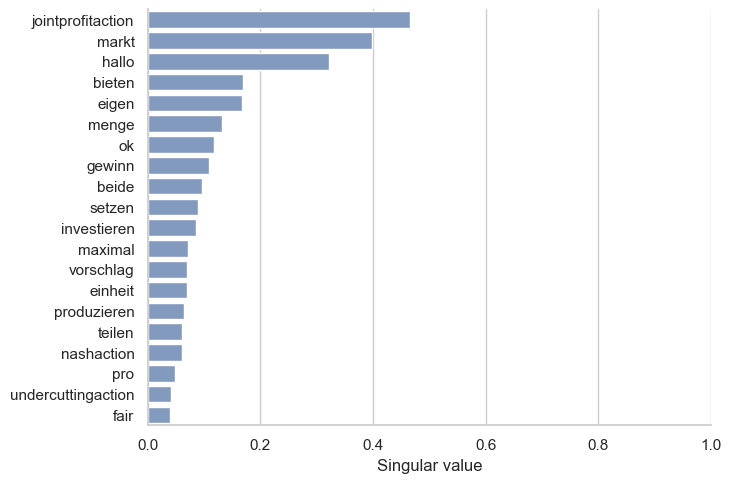

In [41]:
plot_latent_concept(term_concept_matrix, number_of_latent_concept=1,number_of_tokens=20,language='German')

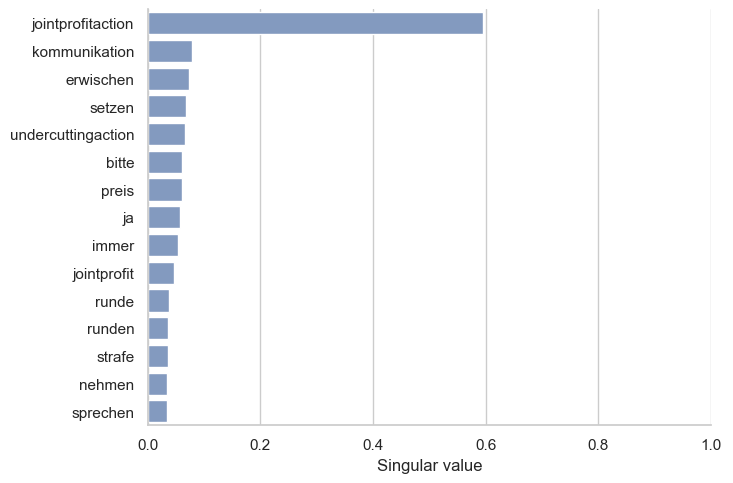

In [42]:
plot_latent_concept(term_concept_matrix, number_of_latent_concept=2,number_of_tokens=15,language='German')

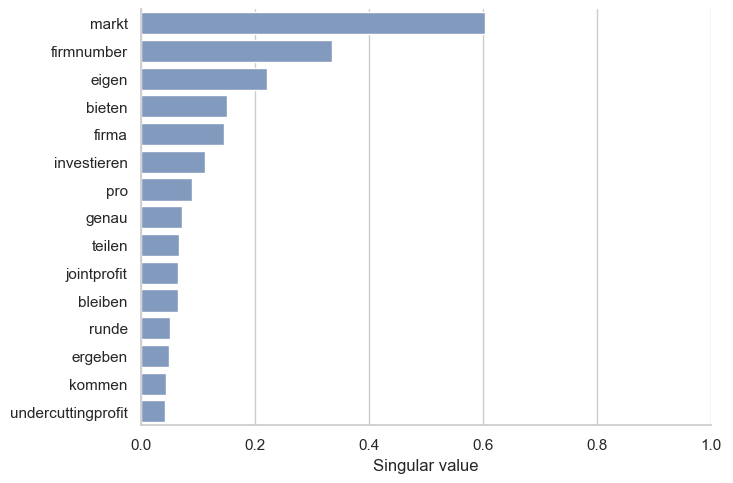

In [21]:
plot_latent_concept(term_concept_matrix, number_of_latent_concept=3,number_of_tokens=15,language='German')

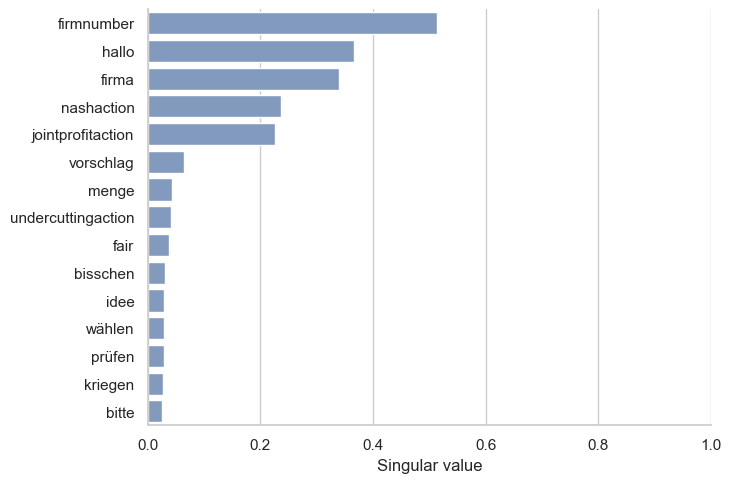

In [22]:
plot_latent_concept(term_concept_matrix, number_of_latent_concept=4,number_of_tokens=15,language='German')

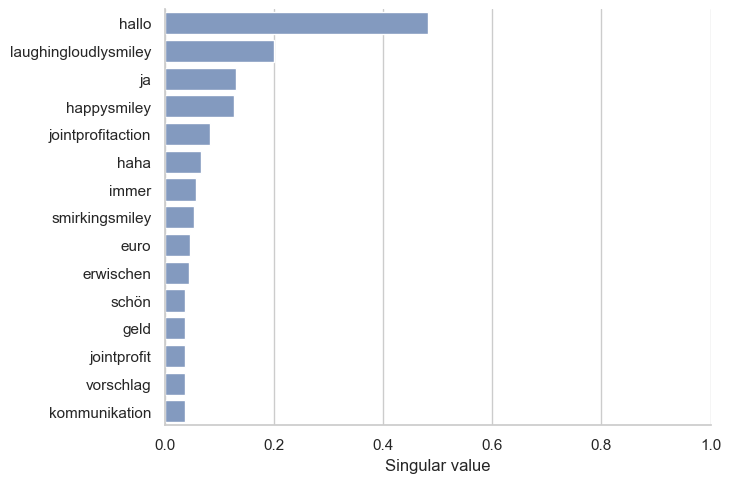

In [23]:
plot_latent_concept(term_concept_matrix, number_of_latent_concept=5,number_of_tokens=15,language='German')

## Add results to the Data Frame

Index the lsa results to the index documents

In [24]:
lsa.index=df[df['document'] != 'nan'].index

Concat the data accordingly

In [25]:
df = pd.concat([df,lsa], axis=1)

Empty documents exhibit zero latent concepts

In [26]:
columns = [f'Latent_concept_{r}' for r in range(0,V_T.shape[1])]
df[columns] = df[columns].fillna(0)

Latent Concept dummy for documents with no communication

In [27]:
df['Latent_concept_99'] = (df['document'] == 'nan').astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudyID            399 non-null    int64  
 1   Author             399 non-null    object 
 2   Title              399 non-null    object 
 3   Year               399 non-null    int64  
 4   Journal            399 non-null    object 
 5   SingleGroup        399 non-null    int64  
 6   Session            399 non-null    int64  
 7   Group              399 non-null    int64  
 8   AvgMatchNo         399 non-null    int64  
 9   CoundOneCoopvar1   399 non-null    float64
 10  CoundOneCoopvar2   399 non-null    float64
 11  CoundAllCoopvar1   399 non-null    float64
 12  CoundAllCoopvar2   399 non-null    float64
 13  T                  399 non-null    float64
 14  R                  399 non-null    float64
 15  S                  399 non-null    float64
 16  P_1                399 non

## Distribution of latent concepts over studies

In [29]:
def plot_concept_distribution(df, var_of_interest, y_lim, y_label, height, aspect):
    
    """
    This function is used to plot the distribution of a concept per study. 
    
    """
    
    g = sns.catplot(data=df, x="AuthorYear", y=var_of_interest, kind='box', color= '#7998C9',
                height=height,aspect=aspect)
    g.set(xlabel=None)
    g.set(ylabel=y_label)
    g.set(ylim=(-1, y_lim))

    #g.figure.savefig(path + '/Figures/Figure_Distribution_'+var_of_interest+'.pdf', dpi = 300)
    
    return g

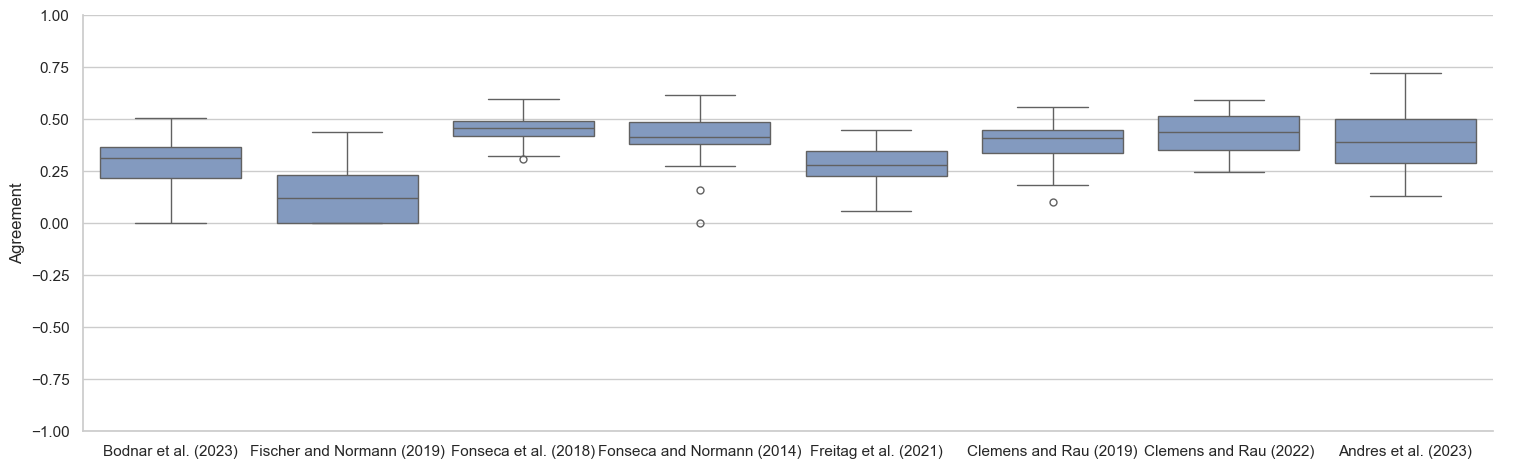

In [30]:
plot_concept_distribution(df=df,
            var_of_interest='Latent_concept_0',
            y_lim=1,
            y_label='Agreement',              
            height=5, 
            aspect=3)

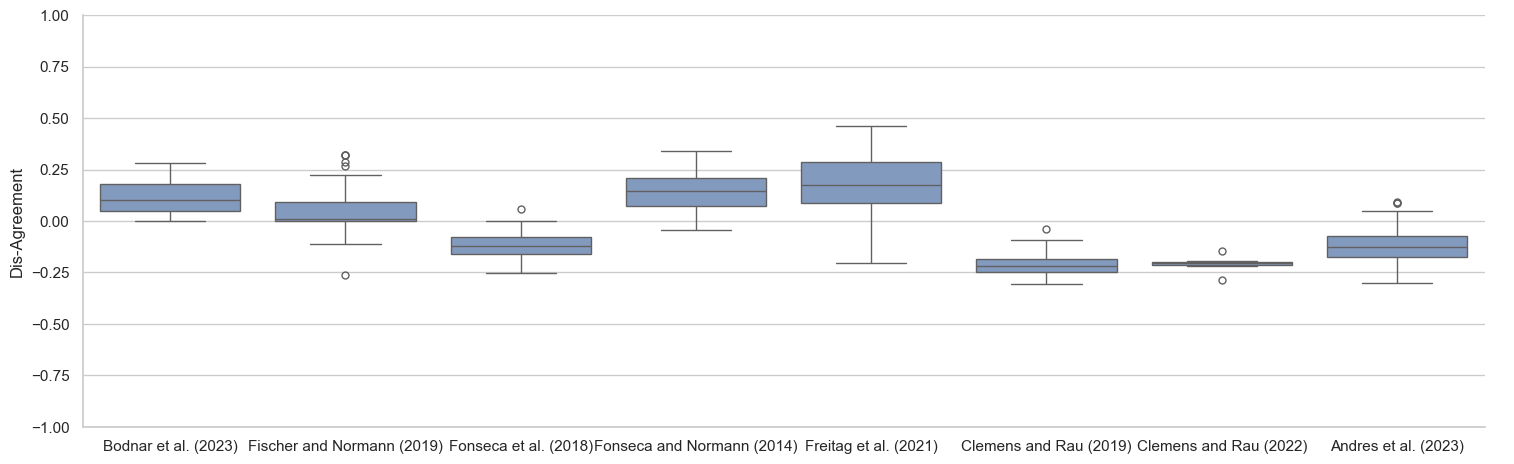

In [31]:
plot_concept_distribution(df=df,
            var_of_interest='Latent_concept_1',
            y_lim=1,
            y_label='Dis-Agreement',              
            height=5, 
            aspect=3)

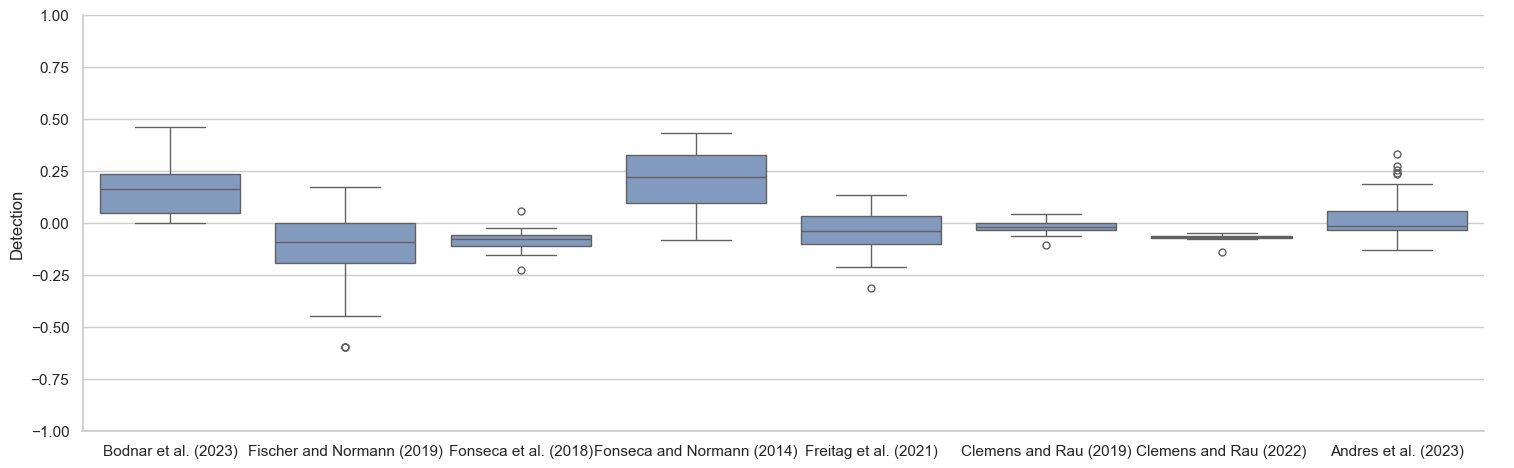

In [32]:
plot_concept_distribution(df=df,
            var_of_interest='Latent_concept_2',
            y_lim=1,
            y_label='Detection',              
            height=5, 
            aspect=3)

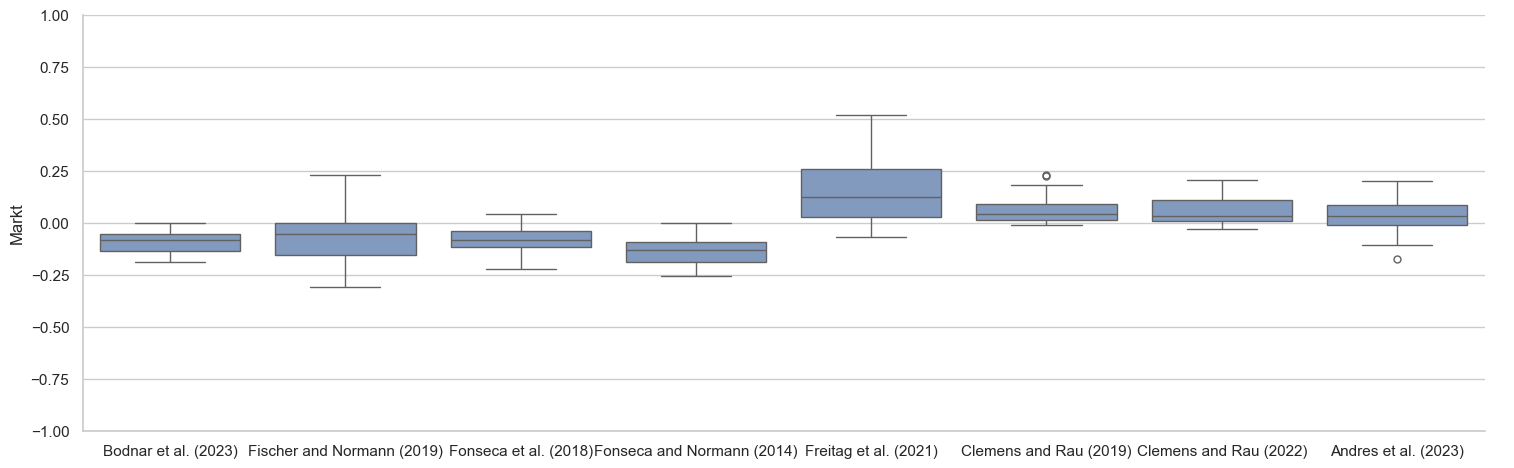

In [33]:
plot_concept_distribution(df=df,
            var_of_interest='Latent_concept_3',
            y_lim=1,
            y_label='Markt',              
            height=5, 
            aspect=3)

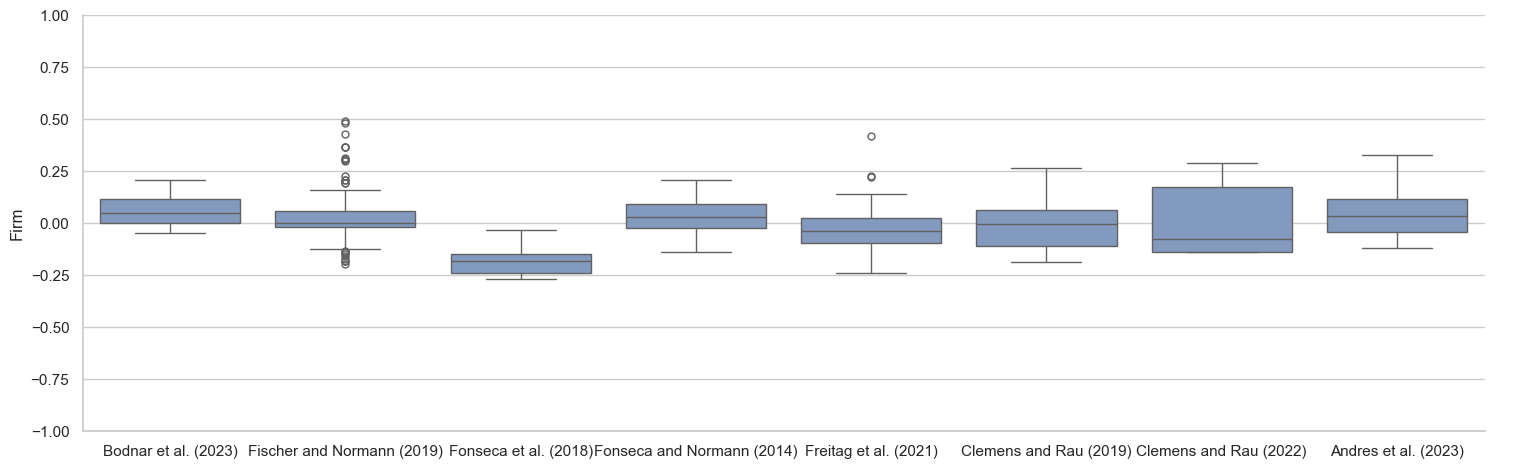

In [34]:
plot_concept_distribution(df=df,
            var_of_interest='Latent_concept_4',
            y_lim=1,
            y_label='Firm',              
            height=5, 
            aspect=3)

## Save the Data Frame

Export the DataFrame to an Excel file

In [35]:
df.to_excel(path + '/Data/Target_GrSe_LSA.xlsx', index=False)